In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from drawarrow import ax_arrow
from highlight_text import fig_text
from pyfonts import load_bunny_font, set_default_font

In [2]:
qatarcars = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-12-09/qatarcars.csv")

In [3]:
qatarcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   origin       105 non-null    object 
 1   make         105 non-null    object 
 2   model        105 non-null    object 
 3   length       105 non-null    float64
 4   width        105 non-null    float64
 5   height       105 non-null    float64
 6   seating      105 non-null    int64  
 7   trunk        105 non-null    int64  
 8   economy      95 non-null     float64
 9   horsepower   105 non-null    int64  
 10  price        105 non-null    int64  
 11  mass         105 non-null    int64  
 12  performance  105 non-null    float64
 13  type         105 non-null    object 
 14  enginetype   105 non-null    object 
dtypes: float64(5), int64(5), object(5)
memory usage: 12.4+ KB


In [4]:
qatarcars.head(2)

,origin,make,model,length,width,height,seating,trunk,economy,horsepower,price,mass,performance,type,enginetype
0,Germany,BMW,3 Series Sedan,4.713,1.827,1.440,5,59,7.6,386,164257,1653,4.3,Sedan,Petrol
1,Germany,BMW,X1,4.505,1.845,1.642,5,505,6.6,313,264000,1701,5.4,SUV,Petrol


In [5]:
qatarcars = qatarcars.sort_values(by="performance")

In [6]:
high_performance=qatarcars[qatarcars["performance"] <= 3.0]

In [7]:
model_list = ["Centodieci", "Chiron", "Evija", "Artura"]
high_performance_models=qatarcars[qatarcars["model"].isin(model_list)]
high_performance_models

,origin,make,model,length,width,height,seating,trunk,economy,horsepower,price,mass,performance,type,enginetype
18,Italy,Bugatti,Centodieci,4.544,2.047,1.200,2,0,22.5,1600,33000000,1976,2.4,Coupe,Petrol
17,Italy,Bugatti,Chiron,4.544,2.037,1.212,2,45,22.3,1578,13103960,1996,2.4,Coupe,Petrol
75,UK,Lotus,Evija,4.459,2.000,1.122,2,0,NaN,1973,8010200,1887,2.9,Coupe,Electric
78,UK,McLaren,Artura,4.539,1.976,1.193,2,0,4.6,671,945700,1395,3.0,Coupe,Hybrid


In [8]:
# Load font
font = load_bunny_font("Akaya Telivigala")
set_default_font(font)

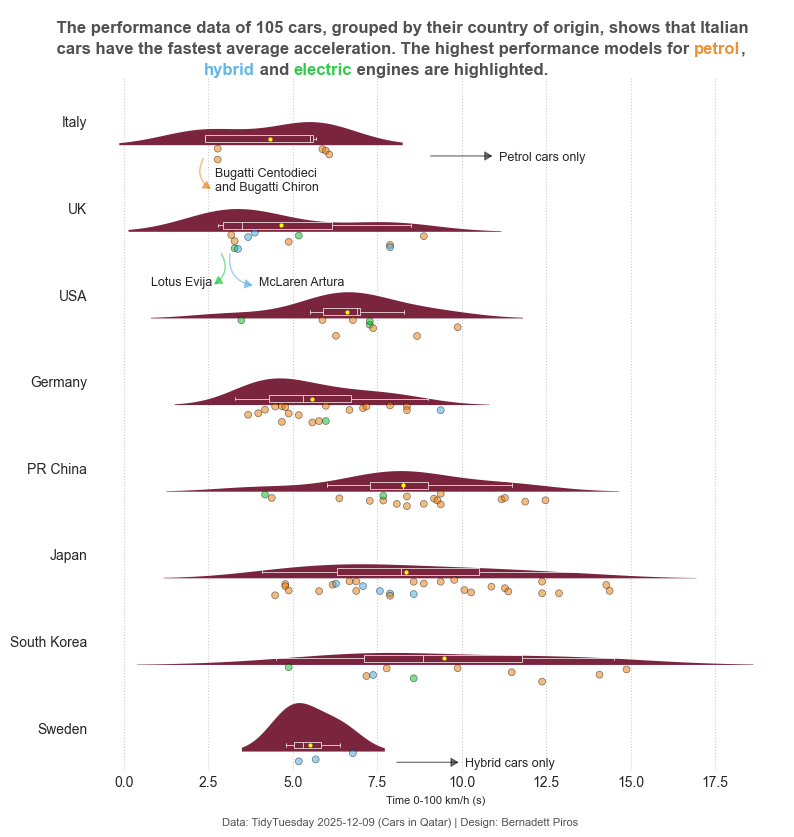

In [9]:
# Style to use
plt.style.use("seaborn-v0_8-white")

fig, ax = plt.subplots(figsize=(9, 9))

# Violin plots 
ax=sns.violinplot(x="performance", y="origin", data=qatarcars, split=True, color="#8A1538", linecolor="none", gap=0.3, inner=None) 

# Number of graphical axis elements 
num_items = len(ax.collections)

# Strip plots 
sns.stripplot(x="performance", y="origin", hue="enginetype", data=qatarcars,  palette=["#E87701", "#00BE1F", "#3AA6E3"], edgecolor="black", linewidth=0.5, 
              alpha=0.5, size=5, legend=False, ax=ax) 

# Loop through the collections 
for item in ax.collections:
    # Get current offsets
    current_offsets = item.get_offsets()
    # Add 0.38 jitter to the strip plots
    item.set_offsets(current_offsets + 0.38)

# Vertical positions for the boxplots
POSITIONS = [0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2]

# Boxplots 
sns.boxplot(x="performance", y="origin", data=qatarcars, width=0.08, positions=POSITIONS, showfliers=False, showmeans=True, 
            meanprops=dict(marker="o", markerfacecolor="yellow", markeredgecolor="none", markersize=3, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), edgecolor="white", linewidth=0.5, zorder=3),
            whiskerprops=dict(linewidth=0.5, color="white"),
            capprops=dict(linewidth=0.5, color="white"),
            medianprops=dict(linewidth=0.5, color="white"))

# High performance model arrows and annotations
ax_arrow(
   tail_position=[2.4, 0.4],
   head_position=[2.65, 0.8],
   color="#E87701",   
   head_width=2.8,
   head_length=4.7,
   alpha=0.5,
   radius=0.5,
   ax=ax,
)

ax.text(2.7, 0.8, s="Bugatti Centodieci\nand Bugatti Chiron", size=9)

ax_arrow(
   tail_position=[2.85, 1.5],
   head_position=[2.6, 1.9],
   color="#00BE1F",   
   head_width=2.8,
   head_length=4.7,
   alpha=0.5,
   radius=-0.5,
   ax=ax,
)

ax.text(0.8, 1.9, s="Lotus Evija", size=9)

ax_arrow(
   tail_position=[3.15, 1.5],
   head_position=[3.9, 1.9],
   color="#3AA6E3",   
   head_width=2.8,
   head_length=4.7,
   alpha=0.5,
   radius=0.5,
   ax=ax,
)

ax.text(4, 1.9, s="McLaren Artura", size=9)

ax_arrow(
   tail_position=[9, 0.4],
   head_position=[11, 0.4],
   color="black",   
   head_width=2.8,
   head_length=4.7,
   alpha=0.5,
   ax=ax,
)

# Enginetype arrows and annotations
ax.text(11.1, 0.45, s="Petrol cars only", size=9)

ax_arrow(
   tail_position=[8, 7.4],
   head_position=[10, 7.4],
   color="black",   
   head_width=2.8,
   head_length=4.7,
   alpha=0.5,
   ax=ax,
)

ax.text(10.1, 7.45, s="Hybrid cars only", size=9)

# Padding for y labels
ax.tick_params(
  axis="y",   
  pad=0  
)
   
# Remove axis ticks
ax.tick_params(axis="both")

# Aestethics
ax.grid(which="major", axis="x", ls="dotted")
ax.spines[["top", "left", "bottom", "right"]].set_visible(False)
ax.set_ylabel(None)
x_lab=dict(size=8)
ax.set_xlabel("Time 0-100 km/h (s)", **x_lab)

# Title
txt = '''
    The performance data of 105 cars, grouped by their country of origin, shows that Italian
    cars have the fastest average acceleration. The highest performance models for <petrol>,
                                    <hybrid> and <electric> engines are highlighted.
    '''
    
fig_text(0.07, 0.95, s=txt, size=12, alpha=0.8, weight="bold",
         highlight_textprops=[
                  {"color": "#E87701"},
                  {"color": "#3AA6E3"}, 
                  {"color": "#00BE1F"}
                  ], fig=fig)

# Add caption
fig.text(0.275, 0.05, "Data: TidyTuesday 2025-12-09 (Cars in Qatar) | Design: Bernadett Piros", size=8, alpha=0.8)

# Show the plot    
plt.show()

#fig.savefig("2025-12-09.png", bbox_inches='tight', pad_inches=0.2)